In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

import utils

In [2]:
SUPPLEMENTAL_DATA_DIR = os.path.expanduser("~/Desktop/Forny_2023_data")

SUPPLEMENTAL_DATA_FILES = {
    "transcriptomics" : {
        "file" : "42255_2022_720_MOESM3_ESM.xlsx",
        "sheet" : "Source Data transcriptomics"
    },
    "proteomics" : {
        "file" : "42255_2022_720_MOESM3_ESM.xlsx",
        "sheet" : "Source Data proteomics"
    },
    "phenotypes" : {
        "file" : "42255_2022_720_MOESM4_ESM.xlsx",
        "sheet" : 0
    }
}

In [3]:
# load
supplemental_data_path = {
    x : {
        "path" : os.path.join(SUPPLEMENTAL_DATA_DIR, y["file"]),
        "sheet" : y["sheet"]
    }
        for x, y in SUPPLEMENTAL_DATA_FILES.items()
}

assert all([os.path.isfile(x["path"]) for x in supplemental_data_path.values()])

supplemental_data = {
    x : pd.read_excel(y["path"], sheet_name = y["sheet"]) for x, y in supplemental_data_path.items()
}

In [4]:
# formatting
supplemental_data["transcriptomics"] = supplemental_data["transcriptomics"].rename({"Unnamed: 0" : "ensembl_gene"}, axis = 1).set_index("ensembl_gene")
supplemental_data["proteomics"] = supplemental_data["proteomics"].rename({"PG.ProteinAccessions" : "uniprot"}, axis = 1).set_index("uniprot")
supplemental_data["phenotypes"] = supplemental_data["phenotypes"].rename({"Unnamed: 0" : "patient_id"}, axis = 1).set_index("patient_id")

In [5]:
supplemental_data["transcriptomics"].head()

,MMA001,MMA002,MMA003,MMA004,MMA005,MMA006,MMA007,MMA008,MMA009,MMA010,...,MMA220,MMA222,MMA223,MMA224,MMA225,MMA226,MMA227,MMA228,MMA229,MMA230
ensembl_gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000187634,1.873615,1.505270,0.986076,1.123403,5.806861,1.431328,1.251731,9.403244,1.353007,1.174570,...,12.565674,5.229523,6.640500,3.129463,1.731466,1.518375,1.121370,1.922590,3.458497,0.989769
ENSG00000188976,13.627592,7.954398,7.072510,7.722724,11.079538,6.171506,6.466709,12.337651,11.094306,5.950285,...,17.705565,9.782707,9.526287,7.936750,6.794779,8.044985,7.041855,8.283558,11.754802,7.057638
ENSG00000187961,1.037994,0.552903,0.436914,0.738782,1.691288,0.438173,0.606665,0.985185,1.486020,0.152516,...,0.839992,0.810122,0.458880,0.343265,0.510889,0.270509,0.218708,0.439597,0.429895,0.604521
ENSG00000187583,0.698824,0.041128,0.024047,0.061751,0.238684,0.037082,0.019218,0.483886,0.058053,0.030468,...,0.862213,0.126554,0.429522,0.041436,0.042376,0.000000,0.076661,0.000000,0.012485,0.014054
ENSG00000187642,0.166474,0.403885,0.033554,0.083613,0.069547,0.042103,0.041908,0.117374,0.019715,0.007449,...,0.185598,0.027146,0.098651,0.000000,0.026749,0.000000,0.011748,0.000000,0.000000,0.023950


In [6]:
supplemental_data["proteomics"].head()

,PG.ProteinDescriptions,PG.ProteinNames,PG.Qvalue,MMA001,MMA002,MMA003,MMA004,MMA005,MMA006,MMA007,...,MMA221,MMA222,MMA223,MMA224,MMA225,MMA226,MMA227,MMA228,MMA229,MMA230
uniprot,,,,,,,,,,,,,,,,,,,,,
A0AVF1,Intraflagellar transport protein 56,IFT56_HUMAN,0.005996,83727.578125,119782.273438,435030.031250,351463.812500,473821.687500,462218.531250,461786.062500,...,96052.937500,203895.218750,367420.562500,128790.132812,258611.218750,236174.890625,281066.500000,57388.179688,21557.371094,165707.18750
A0AVT1,Ubiquitin-like modifier-activating enzyme 6,UBA6_HUMAN,0.000085,37115.953125,46101.957031,65014.164062,71438.554688,42789.007812,41797.777344,40118.589844,...,42814.156250,49667.570312,36617.558594,63397.425781,51176.625000,42973.957031,55355.019531,33448.113281,42359.183594,45239.43750
A0FGR8,Extended synaptotagmin-2,ESYT2_HUMAN,0.000017,40237.117188,217922.515625,197898.968750,122243.023438,152602.468750,170386.234375,158019.125000,...,160844.015625,131429.296875,147733.250000,130756.320312,181981.031250,110166.304688,131816.656250,139880.625000,199221.109375,108320.78125
A1AG_BOVINAlpha-1-acidglycoproteinOS=BostaurusGN=ORM1PE=2SV=1;CONT_Q3SZR3,;(Bos taurus) Alpha-1-acid glycoprotein precursor,NaN,0.000001,46269.468750,456155.343750,76156.734375,70375.281250,71832.406250,88579.406250,80614.843750,...,199413.093750,137026.562500,268573.125000,290260.312500,282464.937500,443858.531250,770606.937500,227444.343750,495527.593750,439083.68750
A1L0T0,Acetolactate synthase-like protein,ILVBL_HUMAN,0.000017,55125.847656,63051.160156,31387.976562,40272.636719,49587.910156,39840.132812,37784.460938,...,57427.914062,77553.562500,42669.714844,61045.855469,34615.488281,37323.367188,65609.390625,62056.046875,52899.207031,36870.06250


In [7]:
supplemental_data["phenotypes"].head()

,case,gender,n_passage,date_collection,date_freezing,consanguinity,onset_age,OHCblMinus,OHCblPlus,ratio,...,cssModif,irritability,hyperventilation,hypothermia,somnolence,vomiting,dehydration,feeding_problem,GFR,responsive_to_acute_treatment
patient_id,,,,,,,,,,,,,,,,,,,,,
MMA001,1,1,3.0,2001,2001,0,28.0,256.0,468.0,1.83,...,1,0,0,0,0,0,0,0,NaN,1
MMA002,1,1,3.0,2001,2001,1,1.0,1610.0,1544.0,0.96,...,2,0,0,0,0,0,1,1,NaN,0
MMA003,1,1,7.0,1991,1996,1,3.0,101.0,76.0,0.76,...,2,0,1,1,0,0,1,0,NaN,0
MMA004,1,0,5.0,1995,1996,0,3.0,220.0,219.0,1.00,...,2,0,0,0,0,0,0,0,NaN,1
MMA005,1,0,3.0,1995,1996,0,1.0,1830.0,1968.0,1.08,...,1,0,0,0,0,0,0,0,NaN,0


In [8]:
supplemental_data["phenotypes"].value_counts("case")

case
1    210
0     20
dtype: int64

## MuData Formatting

To make Napistu more accessible we'd like to lean more heavily on common data structures in genomics. One of these is the AnnData format and its extension to multiomic data MuData.

In [9]:
import anndata as ad
from mudata import MuData

In [10]:
transcr_adata = ad.AnnData(
    X = supplemental_data["transcriptomics"].T,
    # some samples are missing
    obs = supplemental_data["phenotypes"].loc[supplemental_data["phenotypes"].index.isin(supplemental_data["transcriptomics"].columns)],
    )

In [11]:
protein_metadata_vars = supplemental_data["proteomics"].columns[supplemental_data["proteomics"].columns.str.startswith("PG")]

proteomics_adata = ad.AnnData(
    # drop protein metadata vars and transpose
    X = supplemental_data["proteomics"].drop(protein_metadata_vars, axis = 1).T,
    # some samples are missing
    obs = supplemental_data["phenotypes"].loc[supplemental_data["phenotypes"].index.isin(supplemental_data["proteomics"].columns)],
    var = supplemental_data["proteomics"][protein_metadata_vars],
    )

In [12]:
mdata = MuData({"transcriptomics": transcr_adata, "proteomics": proteomics_adata})
mdata

/Users/maya/Desktop/GITHUB/napistu/lib/napistu-scrapyard/applications/forny_2023/.venv/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/Users/maya/Desktop/GITHUB/napistu/lib/napistu-scrapyard/applications/forny_2023/.venv/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


MuData object with n_obs × n_vars = 230 × 19537
  2 modalities
    transcriptomics:	221 x 14749
      obs:	'case', 'gender', 'n_passage', 'date_collection', 'date_freezing', 'consanguinity', 'onset_age', 'OHCblMinus', 'OHCblPlus', 'ratio', 'SimultOHCblMinus', 'SimultOHCblPlus', 'mut_category', 'AdoCblMinus', 'AdoCblPlus', 'SimultAdoCblMinus', 'SimultAdoCblPlus', 'wgs_zygosity', 'prot_mut_level', 'rnaseq_mut_level', 'acidosis', 'metabolic_acidosis', 'metabolic_ketoacidosis', 'ketosis', 'hyperammonemia', 'abnormal_muscle_tone', 'musc_hypotonia', 'musc_hypertonia', 'fct_respiratory_abnormality', 'dyspnea', 'tachypnea', 'reduced_consciousness', 'lethargy', 'coma', 'seizures', 'general_tonic_clonic_seizure', 'any_GI_problem', 'failure_to_thrive', 'any_delay', 'behavioral_abnormality', 'concurrent_infection', 'MMA_urine', 'MMA_plasma', 'ammonia_umolL', 'pH', 'base_excess', 'pCO2', 'glucose_mmolL', 'urine_ketones', 'dialysis', 'peritoneal_dialysis', 'insulin', 'diet', 'carnitine', 'cobalamin', 'bicarb', 'glucose_IV', 'cobalamin_responsive', 'MMA_urine_after_treat', 'cobalamin_dose_PO', 'cobalamin_dose_IM', 'carnitine_dose', 'antibiotic_treatment', 'protein_restriction', 'natural_protein_amount', 'synthetic_protein_amount', 'total_protein_amount', 'meals_per_day', 'calories_per_day', 'tube_feeding_day', 'tube_feeding_night', 'tube_feeding_overall', 'weight_centile_quant', 'length_centile_quant', 'head_circumfernce_quant', 'language_delay', 'IQ', 'any_neurological_abnormalities_chronic', 'impaired_kidney_fct', 'uric_acid', 'creatinine', 'urea', 'hemat_abnormality', 'anemia', 'neutropenia', 'skin_abnormalities', 'hearing_impairment', 'osteoporosis', 'failure_to_thrive_chronic', 'cCSS', 'global_dev_delay_chr', 'hypotonia_chr', 'basal_ganglia_abnormality_chr', 'nCSSonlyNeuro', 'failure_to_thrive_or_tube_feeding', 'cssModif', 'irritability', 'hyperventilation', 'hypothermia', 'somnolence', 'vomiting', 'dehydration', 'feeding_problem', 'GFR', 'responsive_to_acute_treatment'
    proteomics:	230 x 4788
      obs:	'case', 'gender', 'n_passage', 'date_collection', 'date_freezing', 'consanguinity', 'onset_age', 'OHCblMinus', 'OHCblPlus', 'ratio', 'SimultOHCblMinus', 'SimultOHCblPlus', 'mut_category', 'AdoCblMinus', 'AdoCblPlus', 'SimultAdoCblMinus', 'SimultAdoCblPlus', 'wgs_zygosity', 'prot_mut_level', 'rnaseq_mut_level', 'acidosis', 'metabolic_acidosis', 'metabolic_ketoacidosis', 'ketosis', 'hyperammonemia', 'abnormal_muscle_tone', 'musc_hypotonia', 'musc_hypertonia', 'fct_respiratory_abnormality', 'dyspnea', 'tachypnea', 'reduced_consciousness', 'lethargy', 'coma', 'seizures', 'general_tonic_clonic_seizure', 'any_GI_problem', 'failure_to_thrive', 'any_delay', 'behavioral_abnormality', 'concurrent_infection', 'MMA_urine', 'MMA_plasma', 'ammonia_umolL', 'pH', 'base_excess', 'pCO2', 'glucose_mmolL', 'urine_ketones', 'dialysis', 'peritoneal_dialysis', 'insulin', 'diet', 'carnitine', 'cobalamin', 'bicarb', 'glucose_IV', 'cobalamin_responsive', 'MMA_urine_after_treat', 'cobalamin_dose_PO', 'cobalamin_dose_IM', 'carnitine_dose', 'antibiotic_treatment', 'protein_restriction', 'natural_protein_amount', 'synthetic_protein_amount', 'total_protein_amount', 'meals_per_day', 'calories_per_day', 'tube_feeding_day', 'tube_feeding_night', 'tube_feeding_overall', 'weight_centile_quant', 'length_centile_quant', 'head_circumfernce_quant', 'language_delay', 'IQ', 'any_neurological_abnormalities_chronic', 'impaired_kidney_fct', 'uric_acid', 'creatinine', 'urea', 'hemat_abnormality', 'anemia', 'neutropenia', 'skin_abnormalities', 'hearing_impairment', 'osteoporosis', 'failure_to_thrive_chronic', 'cCSS', 'global_dev_delay_chr', 'hypotonia_chr', 'basal_ganglia_abnormality_chr', 'nCSSonlyNeuro', 'failure_to_thrive_or_tube_feeding', 'cssModif', 'irritability', 'hyperventilation', 'hypothermia', 'somnolence', 'vomiting', 'dehydration', 'feeding_problem', 'GFR', 'responsive_to_acute_treatment'
      var:	'PG.ProteinDescriptions', 'PG.ProteinNames', 'PG.Qvalue'

In [13]:
# look like we can have anndata results which don't actually have an obs matrix
# this will be helpful for representing drug-screen results, QTLs, etc.
# ad.AnnData(var = supplemental_data["proteomics"][protein_metadata_vars])

## EDA

Before digging into the results of the study its a good idea to understand the major factors driving the studies variation. Ideally, these are the variables of interest (i.e, case) but to the extent this is not true then we may have to add additional covariates or hunt for batch effects. Its also a good idea to generate a scree plot to see whether the variation is driven by a few known or unknown variables or if there are many sources of variation. Since this study has a large number of patient-derived samples I'm guessing we're in the latter scenario.

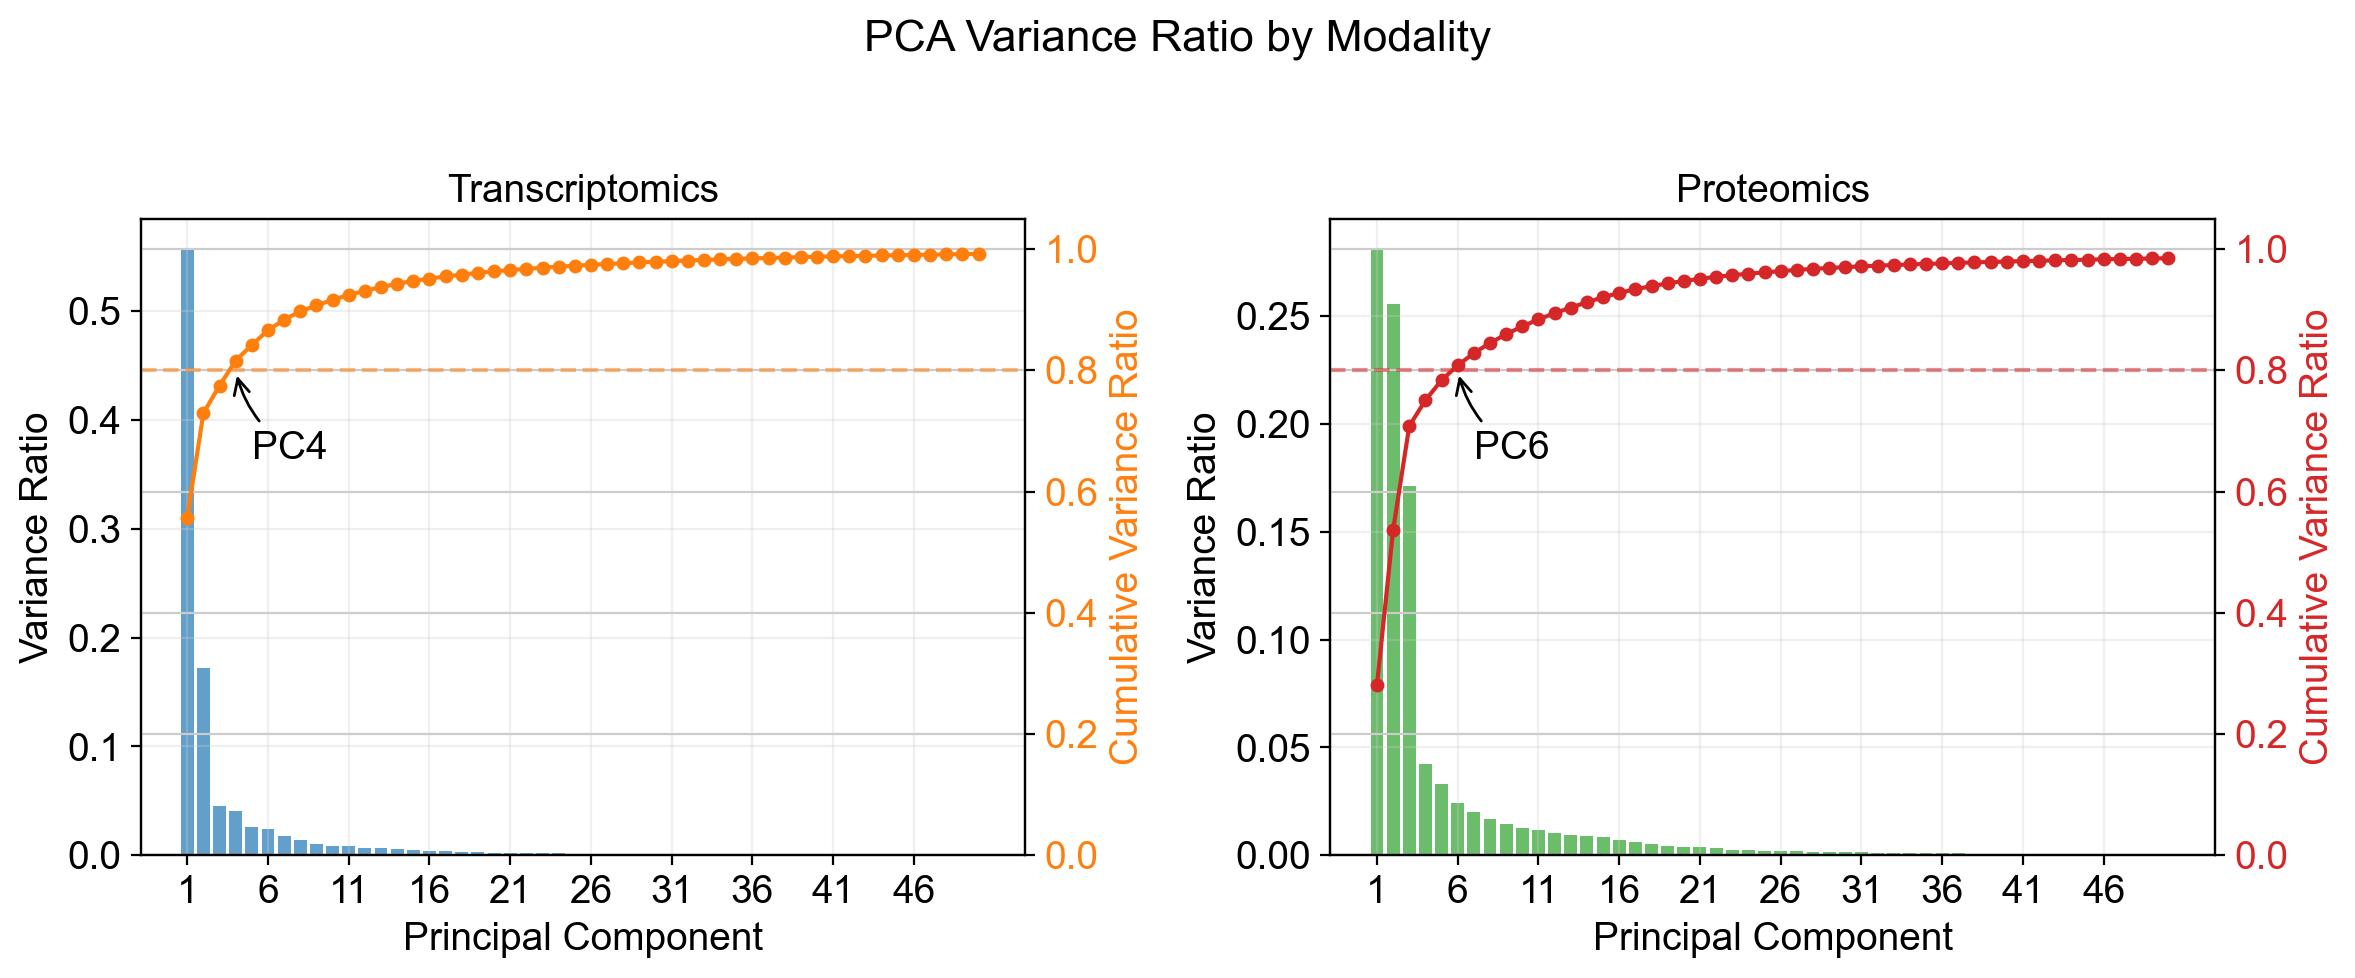

In [14]:
import scanpy as sc

# Process each modality
for modality in ['transcriptomics', 'proteomics']:
    # add PCs
    sc.pp.pca(mdata[modality])
    
utils.plot_mudata_pca_variance(mdata)
plt.show()

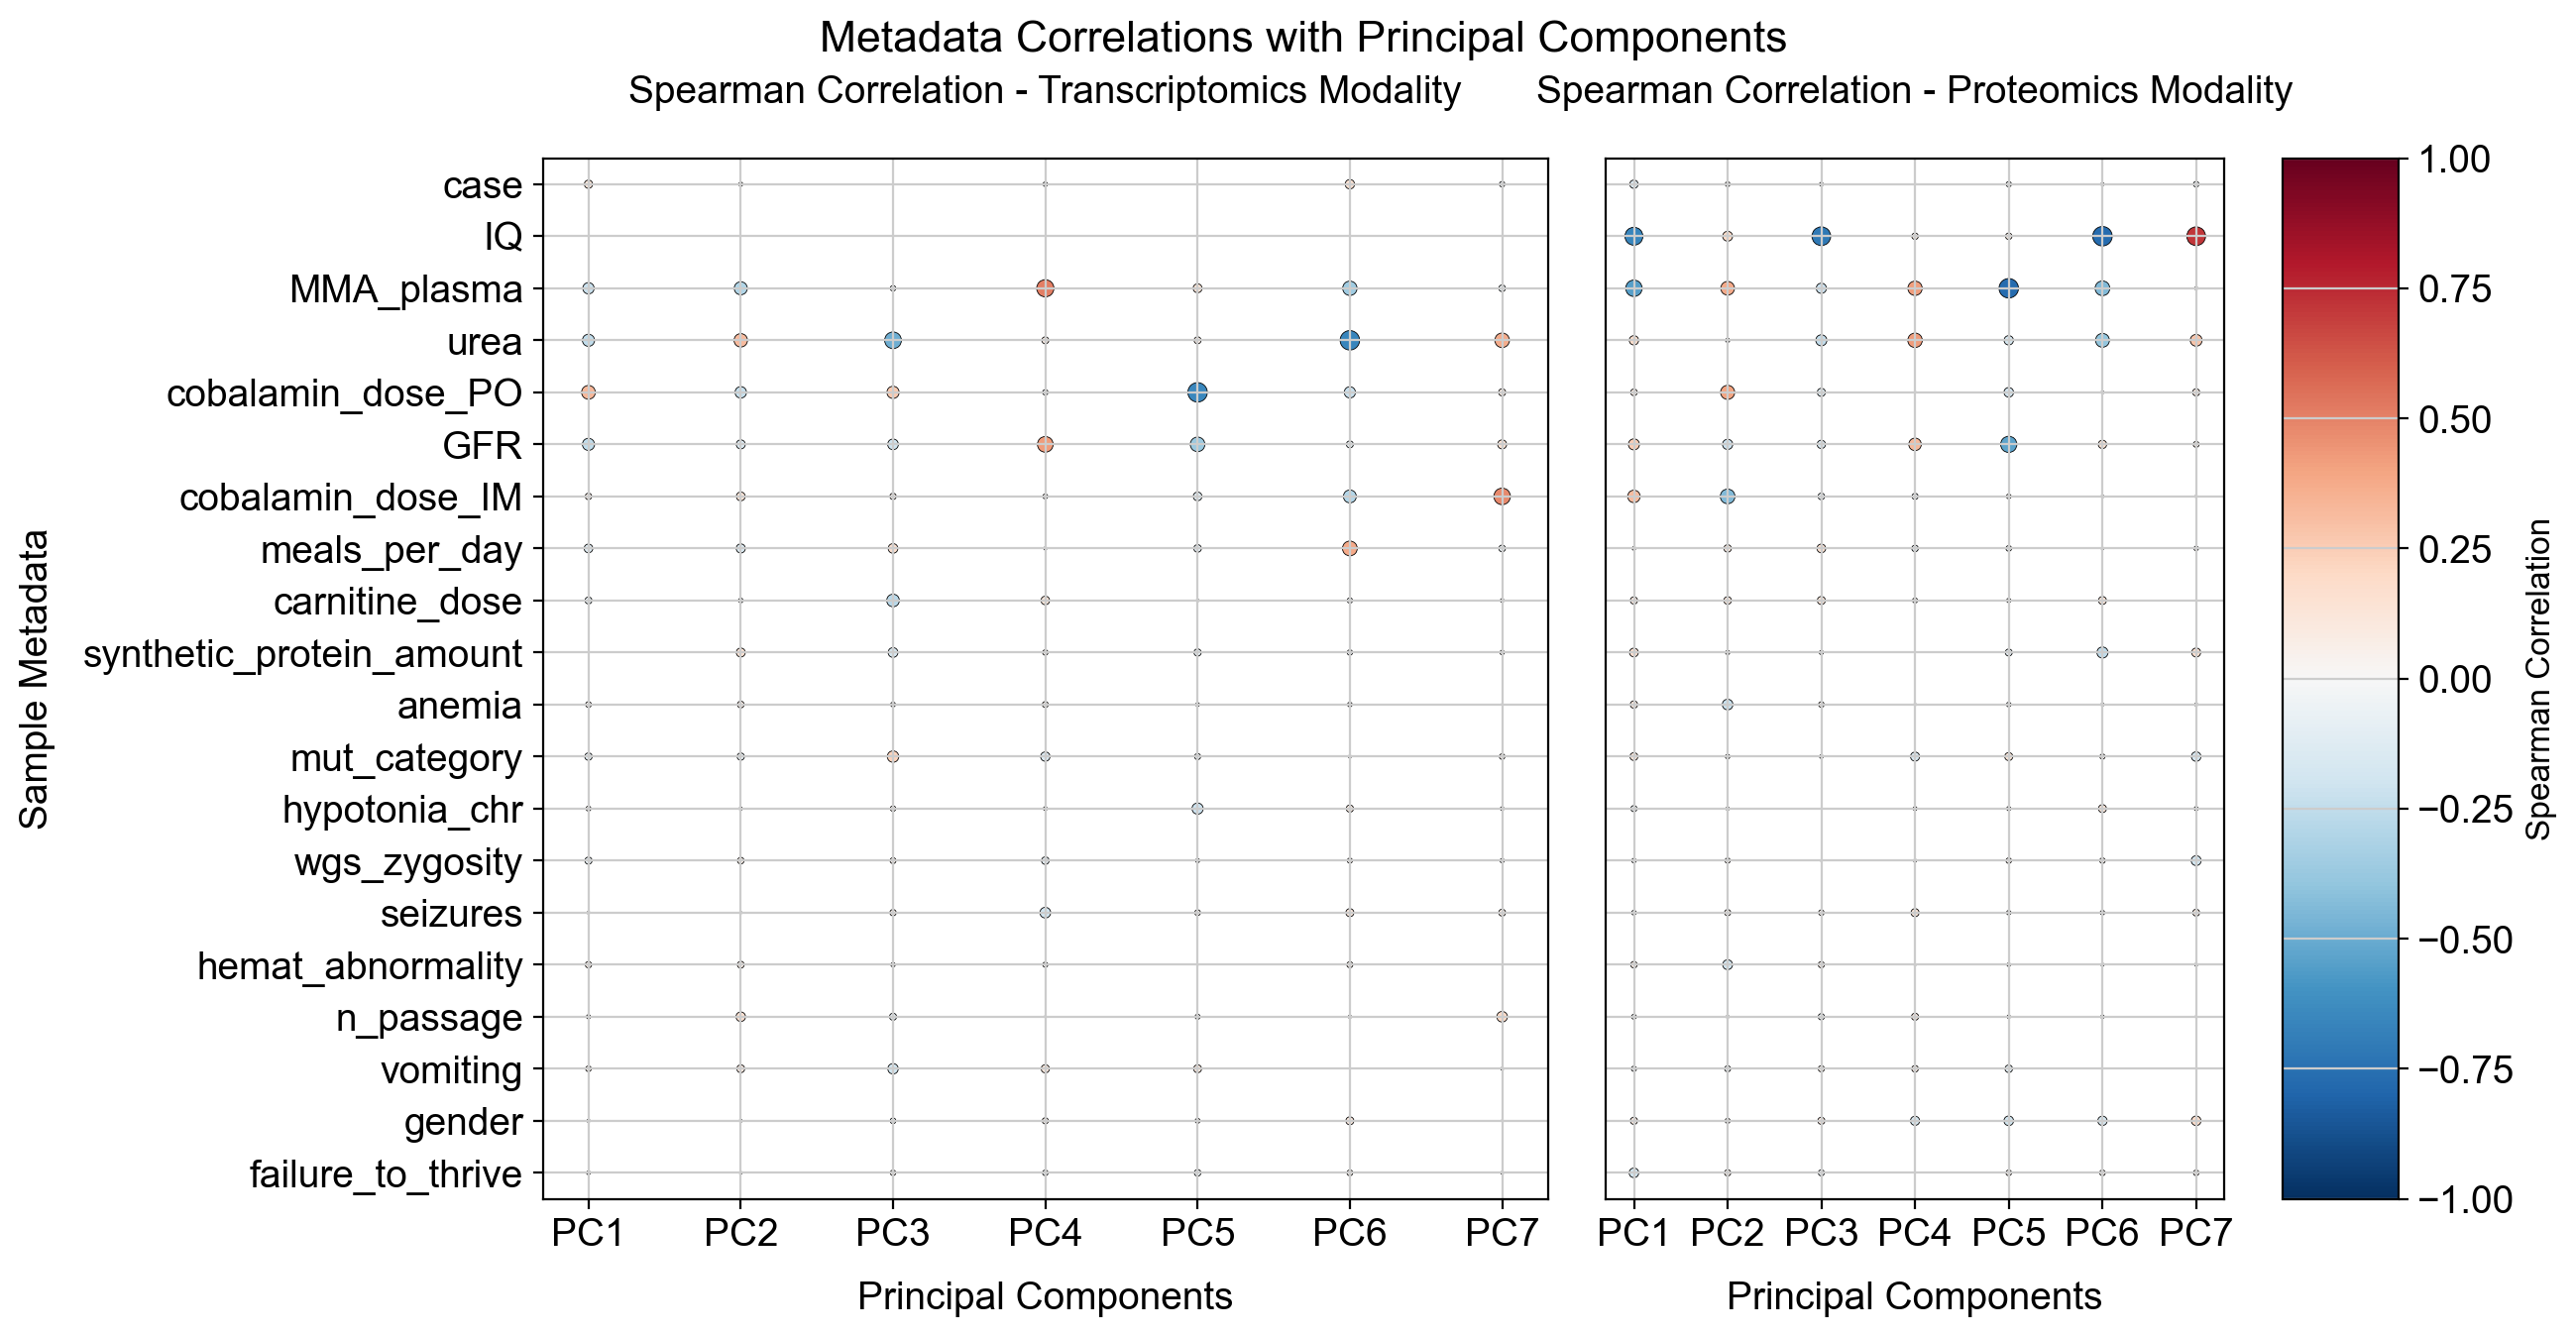

In [15]:
results = utils.analyze_pc_metadata_correlation_mudata(
    mdata,
    n_pcs=7,
    prioritized_vars=['case'],  # This will always show 'case' variable at the top
    pca_kwargs={'svd_solver': 'arpack'},
    
    figsize = (12, 7)
)

plt.show()

In [62]:
mdata["transcriptomics"].obs

,case,gender,n_passage,date_collection,date_freezing,consanguinity,onset_age,OHCblMinus,OHCblPlus,ratio,...,cssModif,irritability,hyperventilation,hypothermia,somnolence,vomiting,dehydration,feeding_problem,GFR,responsive_to_acute_treatment
patient_id,,,,,,,,,,,,,,,,,,,,,
MMA001,1,1,3.0,2001,2001,0,28.0,256.0,468.0,1.83,...,1,0,0,0,0,0,0,0,NaN,1
MMA002,1,1,3.0,2001,2001,1,1.0,1610.0,1544.0,0.96,...,2,0,0,0,0,0,1,1,NaN,0
MMA003,1,1,7.0,1991,1996,1,3.0,101.0,76.0,0.76,...,2,0,1,1,0,0,1,0,NaN,0
MMA004,1,0,5.0,1995,1996,0,3.0,220.0,219.0,1.00,...,2,0,0,0,0,0,0,0,NaN,1
MMA005,1,0,3.0,1995,1996,0,1.0,1830.0,1968.0,1.08,...,1,0,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMA226,0,0,2.0,2001,2001,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,0
MMA227,0,0,3.0,2005,2005,1,28.0,4948.0,4356.0,0.88,...,1,0,0,0,0,0,0,0,NaN,0
MMA228,0,0,3.0,2006,2006,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,0


Processing transcriptomics modality...
Processing proteomics modality...


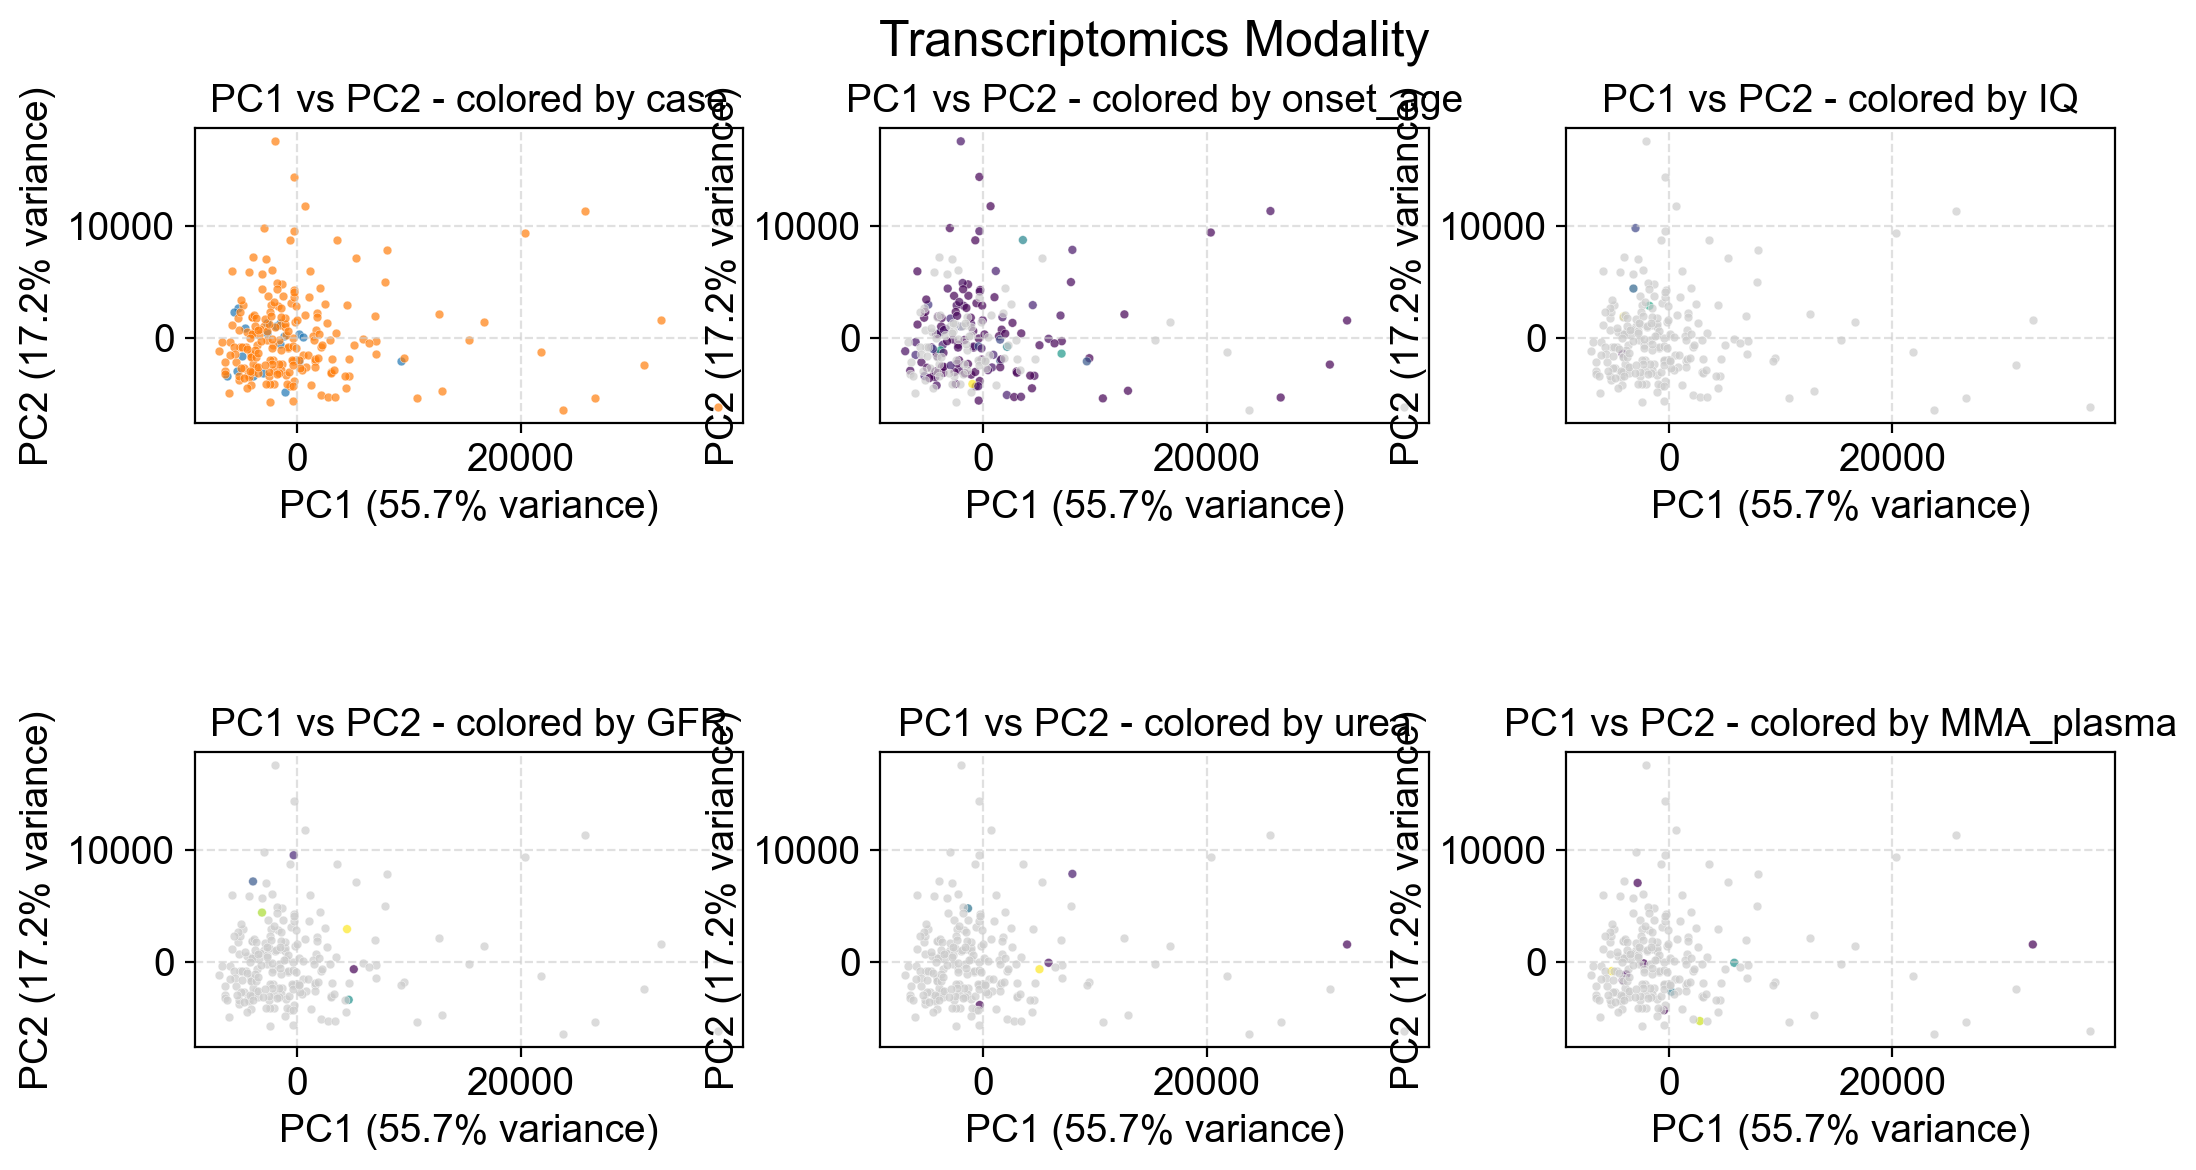

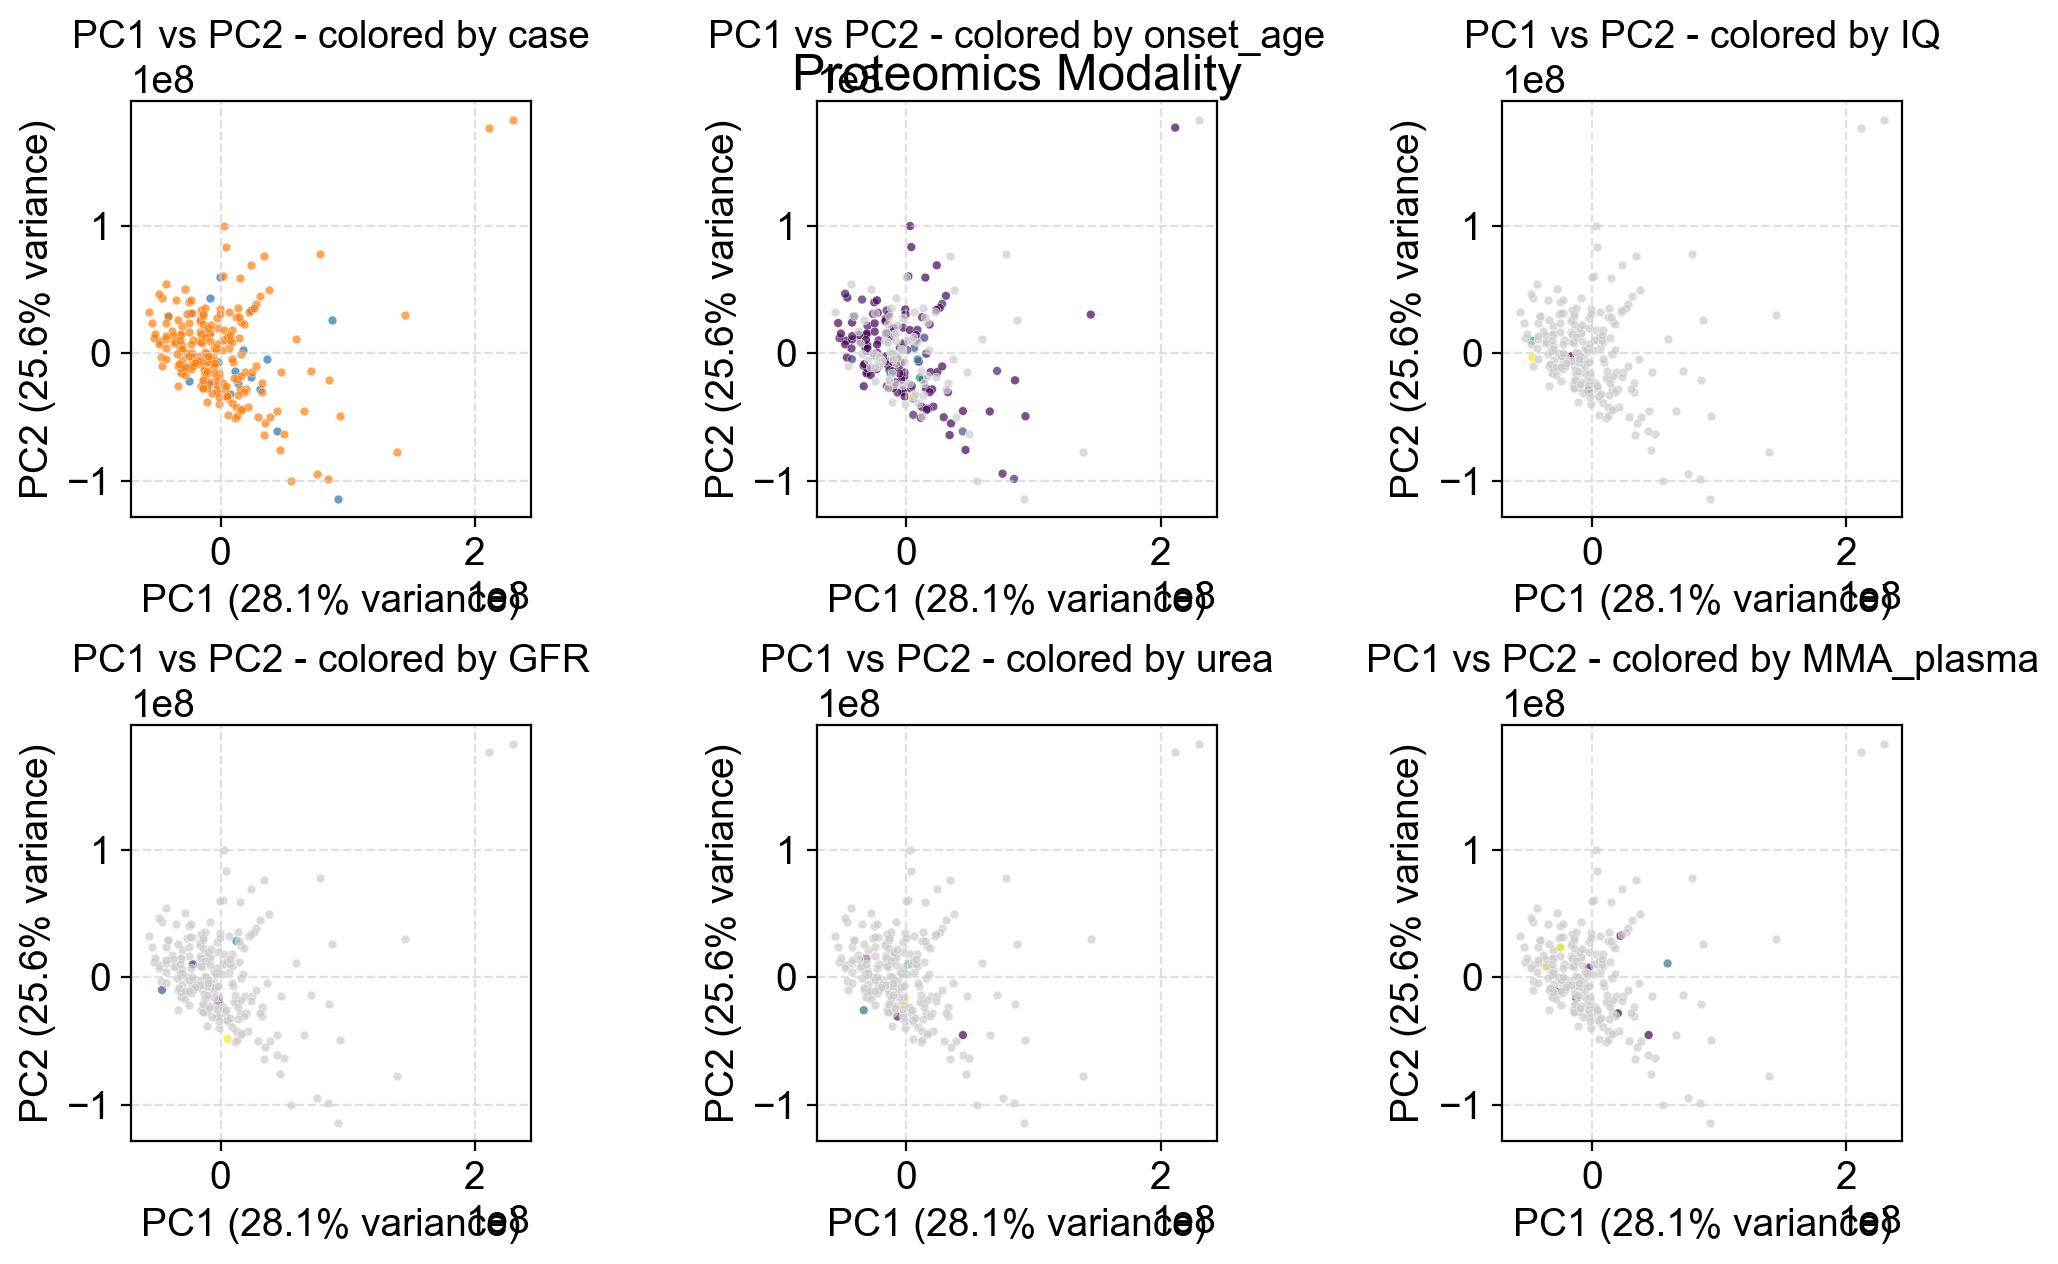

In [76]:
SAMPLE_ATTRIBUTES = ["case", "onset_age", "IQ","GFR", "urea", "MMA_plasma"]

plot_mudata_pc1_vs_pc2(
    mdata, 
    metadata_attrs=SAMPLE_ATTRIBUTES,
    figsize = (12, 8),
    point_size = 10,
    legend = False
)
plt.show()

## Generating multi-omic profiles

To map our results onto Napistu network representations we need to generate a set of feature-level summaries. This can be done in multiple ways but for this analysis we'll use a supervised method, differential expression analysis, and an unsupervised one, factor analysis.

### Differential Expression Analysis

I've always done diffex in R, using data modality agnostic methods like regression, and modality-specific methods like DESeq2. 

In [18]:
#from pydeseq2.dds import DeseqDataSet

# hmmm, looks like a RPKM/TPM matrix rather than a count matrix. DESeq is a no-go
#DeseqDataSet(
#    adata = mdata["transcriptomics"],
#    design = "~ case"
#)

In [79]:
# List of modalities to process
modalities = ["transcriptomics", "proteomics"]  # Add other modalities as needed

# Process each modality
for modality in modalities:
    print(f"Processing {modality}...")
    
    # Skip if modality doesn't exist in the mdata object
    if modality not in mdata.mod:
        print(f"Modality {modality} not found in MuData object. Skipping.")
        continue
    
    # Apply regression per feature
    summaries = utils.apply_regression_per_feature(
        mdata[modality],
        "~ case + gender",
        n_jobs=4
    )
    
    # Add results to the AnnData object
    utils.add_regression_results_to_anndata(
        mdata[modality],
        summaries,
        key_added="case_effect",
        fdr_cutoff=0.1
    )
    
    print(f"Completed regression analysis for {modality}")

print("Regression analysis completed for all modalities")

Processing transcriptomics...
Starting regression analysis with 4 cores...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 508 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1008 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 1708 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 2408 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 3308 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 4208 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 5308 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 6408 tasks      | elapsed:    4.7s
[Parallel(n_jobs=4)]: Done 7708 tasks      | elapsed:    5.7s
[Parallel(n_jobs=4)]: Done 9008 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 10508 tasks      | elapsed:    7.6s
[Parallel(n_jobs=4)]: Done 12008 tasks      | elapsed:    8.5s
[Parallel(n_jobs=4)]: Done 13708 tasks      | elapsed:    

Completed regression analysis for 29498 feature-coefficient pairs.
Completed regression analysis for transcriptomics
Processing proteomics...
Starting regression analysis with 4 cores...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 508 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1008 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1708 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 2408 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 3308 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 4208 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 4489 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 4588 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 4705 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 4788 out of 4788 | elapsed:    3.6s finished


Completed regression analysis for 9576 feature-coefficient pairs.
Completed regression analysis for proteomics
Regression analysis completed for all modalities


In [82]:
mdata["transcriptomics"].obs

,case,gender,n_passage,date_collection,date_freezing,consanguinity,onset_age,OHCblMinus,OHCblPlus,ratio,...,cssModif,irritability,hyperventilation,hypothermia,somnolence,vomiting,dehydration,feeding_problem,GFR,responsive_to_acute_treatment
patient_id,,,,,,,,,,,,,,,,,,,,,
MMA001,1,1,3.0,2001,2001,0,28.0,256.0,468.0,1.83,...,1,0,0,0,0,0,0,0,NaN,1
MMA002,1,1,3.0,2001,2001,1,1.0,1610.0,1544.0,0.96,...,2,0,0,0,0,0,1,1,NaN,0
MMA003,1,1,7.0,1991,1996,1,3.0,101.0,76.0,0.76,...,2,0,1,1,0,0,1,0,NaN,0
MMA004,1,0,5.0,1995,1996,0,3.0,220.0,219.0,1.00,...,2,0,0,0,0,0,0,0,NaN,1
MMA005,1,0,3.0,1995,1996,0,1.0,1830.0,1968.0,1.08,...,1,0,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MMA226,0,0,2.0,2001,2001,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,0
MMA227,0,0,3.0,2005,2005,1,28.0,4948.0,4356.0,0.88,...,1,0,0,0,0,0,0,0,NaN,0
MMA228,0,0,3.0,2006,2006,0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,NaN,0


### Factor Analysis

Since we have two data modalities and we'd like to find patterns of covaration which span both data modalities we can 

In [ ]:
import muon

In [ ]:
mofa = muon.tl.mofa(
    mdata,
    use_obs = "intersection",
    # no feature selection
    use_var = None
    )

In [94]:
import numpy as np

In [102]:
reconstruction = np.matmul(
    mdata.obsm["X_mofa"],
    mdata.varm["LFs"].T
)


In [ ]:
reconstruction.shape

In [ ]:
mdata.varm["LFs"].shape

In [ ]:
mdata.varm["LFs"]

In [79]:
mofa